In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

In [ ]:
df = sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
print("\n Summery : ")
df.describe()


 Summery : 


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
print("\nMissing Value :")
(df.isnull().sum())


Missing Value :


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
print("List Of columns With Categorical Datasets :")

df.select_dtypes(include=['object']).columns.to_list()

List Of columns With Categorical Datasets :


['species']

In [6]:
encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['species'])

In [7]:
print("\nEncoded Classes : ")
encoder.classes_


Encoded Classes : 


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
print(f"Datasets :{df.shape}")
print("\nGrouped Mean By Species : ")
print(df.groupby('species').mean())

Datasets :(150, 6)

Grouped Mean By Species : 
            sepal_length  sepal_width  petal_length  petal_width  \
species                                                            
setosa             5.006        3.428         1.462        0.246   
versicolor         5.936        2.770         4.260        1.326   
virginica          6.588        2.974         5.552        2.026   

            species_encoded  
species                      
setosa                  0.0  
versicolor              1.0  
virginica               2.0  


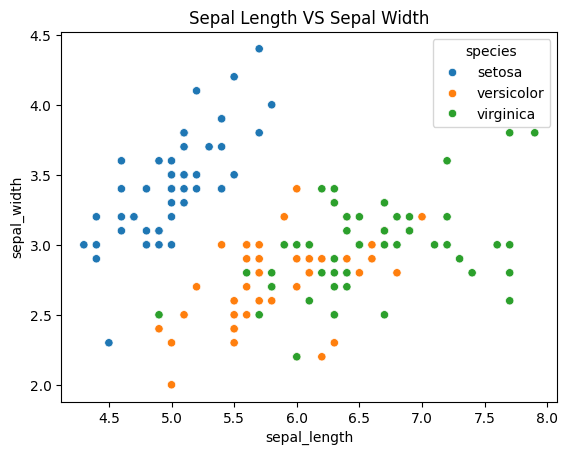

In [9]:
sns.scatterplot(x="sepal_length",y="sepal_width",data=df,hue='species')
plt.title("Sepal Length VS Sepal Width")
plt.show()

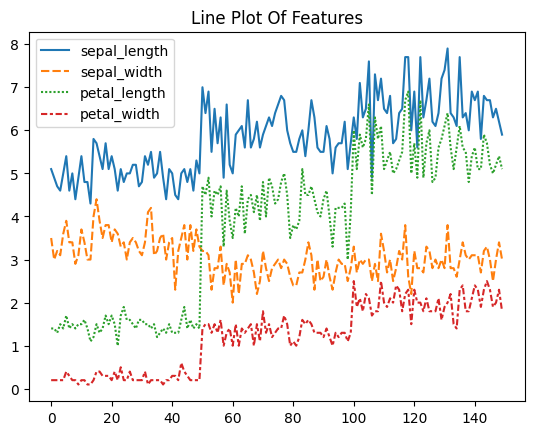

In [10]:
sns.lineplot(data=df.drop(['species','species_encoded'],axis=1))
plt.title("Line Plot Of Features")
plt.show()

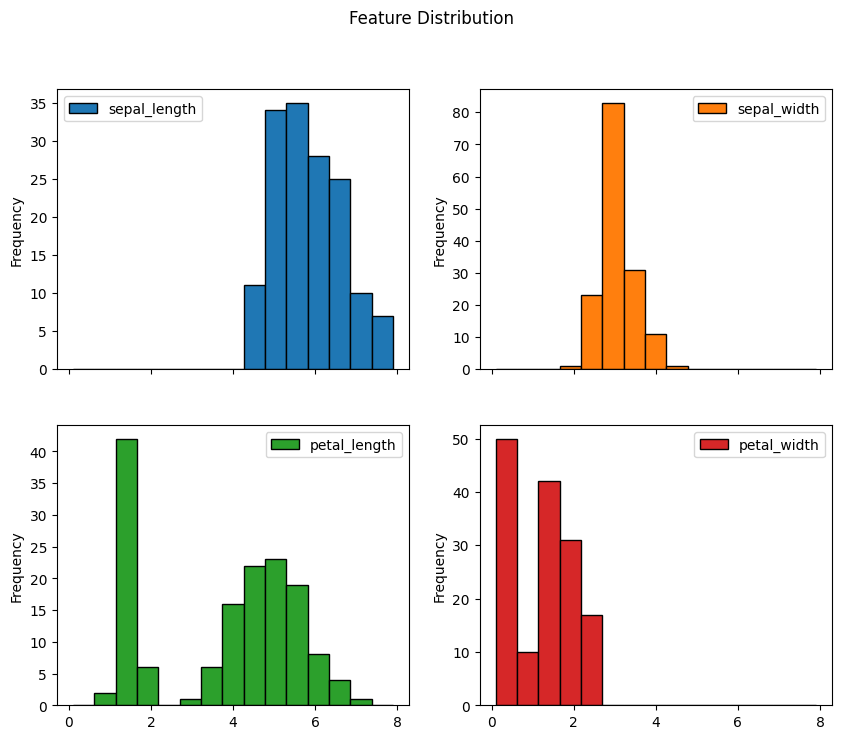

In [11]:
df.drop(['species','species_encoded'],axis=1).plot.hist(subplots=True,layout=(2,2),figsize=(10,8),bins=15,edgecolor='black')
plt.suptitle("Feature Distribution")
plt.show()

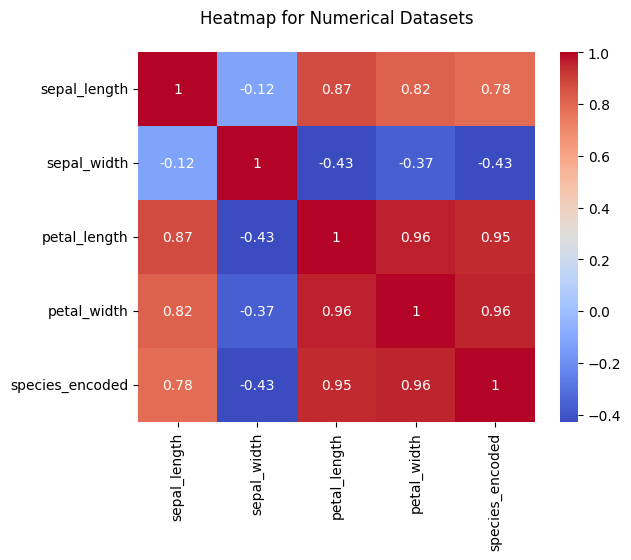

In [12]:
numeric_df = df.select_dtypes(include=['int64','float'])
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("Heatmap for Numerical Datasets\n")
plt.show()

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [14]:
X = df.drop(columns=['species','species_encoded'],axis=1)
y = df['species_encoded']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(f"Training_Dataset Shape : {X_train.shape}")
print(f"Testing_Dataset Shape : {X_test.shape}")

Training_Dataset Shape : (112, 4)
Testing_Dataset Shape : (38, 4)


In [16]:
temp_model = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "AdaBoost":AdaBoostRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "DecisionTress":DecisionTreeRegressor()
}

In [17]:
model_list =[]
r2_list = []

for i in range(len(list(temp_model))):
    model = list(temp_model.values())[i]

    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2_score = r2_score(y_train,y_train_pred)
    test_r2_score = r2_score(y_test,y_test_pred)
    r2_list.append(test_r2_score)

    model_list.append(list(temp_model.keys())[i])
    print(model)
    print(f"Training Score : ",train_r2_score)
    print(f"Testing Score : ",test_r2_score)
    print("="*40)


LinearRegression()
Training Score :  0.9225512936540917
Testing Score :  0.9487283360348984
Lasso()
Training Score :  0.3813333624742523
Testing Score :  0.3835841309840886
Ridge()
Training Score :  0.9222217743270339
Testing Score :  0.945942915905306
AdaBoostRegressor()
Training Score :  0.9748206557081249
Testing Score :  0.9692259708261124
Training Score :  0.9997480159783277
Testing Score :  0.9895039774745089
RandomForestRegressor()
Training Score :  0.9884859556752785
Testing Score :  0.9990845624385447
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
       

In [18]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','score']).sort_values(by=["score"],ascending=False)


,model,score
7,DecisionTress,1.000000
5,RandomForestRegressor,0.999085
6,XGBRegressor,0.998126
4,CatBoostRegressor,0.989504
3,AdaBoost,0.969226
0,LinearRegression,0.948728
2,Ridge,0.945943
1,Lasso,0.383584


In [19]:
final_model = DecisionTreeRegressor()
final_model = final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print(r2_score(y_test,y_pred) * 100)

100.0


In [20]:
joblib.dump(final_model,"iris_model.pkl")
print("Model Saved Succesfully ")

Model Saved Succesfully 
